## Hidden Markov Models 
Learn how to use `hmmlearn` and use it to:
1. generate data 
2. fit models to the data
3. run classification on the fake data

Then move to DTW; then to real world data.  

In [2]:
import pandas as pd
import numpy as np
from hmmlearn import hmm
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
%matplotlib inline

#### Test: How it works?

In [3]:
np.random.seed(42)
model = hmm.GaussianHMM(n_components = 2, covariance_type = "diag")

# Vector pi; shape: (n_components,)
model.startprob_ = np.array([0.9, 0.1]) 

# Matrix A; shape: (n_components, n_components)
model.transmat_ = np.array([[0.9, 0.1],
                            [0.1, 0.9]])

# Emission distribution means (Gaussian); shape: (n_components, n_features)
model.means_ = np.array([[0], [3]])

# Emission distribution covariation matrix? (Gaussian); shape: (n_components, n_features)
# Shape depends on type of covariance matrix and for some there's a need to manually set n_features (bug)
model.covars_ = np.array([[0.1], [0.5]])
X, Z = model.sample(50)

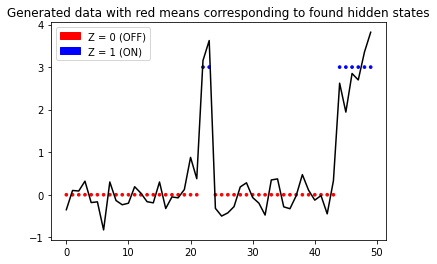

In [4]:
# Data
means = [model.means_[i] for i in Z]
colors = ["red" if z==0 else "blue" for z in Z]
# Legend
red_patch = mpatches.Patch(color = 'red', label = 'Z = 0 (OFF)')
blue_patch = mpatches.Patch(color = 'blue', label = 'Z = 1 (ON)')

plt.plot(X, color = "black")
plt.scatter(np.array(range(len(Z))), means, color = colors, s = 7)
plt.title("Generated data with red means corresponding to found hidden states")
plt.legend(handles=[red_patch, blue_patch])

#### Different models for classification
- 3 devices with on/off switch (2 states). Almost no variance when device is off. Two models are similar.
- 1 device with 5 states
- 2 devices with 3 states
- 3 devices with one state

##### Create 9 models

In [56]:
models_lst = []

In [57]:
model_switch_1 = hmm.GaussianHMM(n_components= 2, covariance_type= "diag")
model_switch_1.means_ = np.array([[0.5],[100]])
model_switch_1.covars_ = np.array([[0.001],[10]])
model_switch_1.startprob_ = np.array([0.8, 0.2])
model_switch_1.transmat_ = np.array([[0.9, 0.1],
                                    [0.5, 0.5]])
models_lst.append(model_switch_1)

In [58]:
model_switch_2 = hmm.GaussianHMM(n_components= 2, covariance_type= "diag")
model_switch_2.means_ = np.array([[0.5],[98]])
model_switch_2.covars_ = np.array([[0.001],[4]])
model_switch_2.startprob_ = np.array([0.7, 0.3]) # pytanie: Czy start prob nie powinno być punktem stacj. czy cośtam macierzy A?
model_switch_2.transmat_ = np.array([[0.8, 0.2],
                                    [0.6, 0.4]])
models_lst.append(model_switch_2)

In [59]:
model_switch_3 = hmm.GaussianHMM(n_components= 2, covariance_type= "diag")
model_switch_3.means_ = np.array([[0.5],[50]])
model_switch_3.covars_ = np.array([[0.001],[5]])
model_switch_3.startprob_ = np.array([0.3, 0.7])
model_switch_3.transmat_ = np.array([[0.6, 0.4],
                                    [0.2, 0.8]
                                    ])
                                    
models_lst.append(model_switch_3)

In [60]:
model_1hidden_1 = hmm.GaussianHMM(n_components= 1, covariance_type= "diag")
model_1hidden_1.means_ = np.array([[100]])
model_1hidden_1.covars_ = np.array([[30]])
model_1hidden_1.startprob_ = np.array([1])
model_1hidden_1.transmat_ = np.array([[1]])
models_lst.append(model_1hidden_1)

In [61]:
model_1hidden_2 = hmm.GaussianHMM(n_components= 1, covariance_type= "diag")
model_1hidden_2.means_ = np.array([[50]])
model_1hidden_2.covars_ = np.array([[1]])
model_1hidden_2.startprob_ = np.array([1])
model_1hidden_2.transmat_ = np.array([[1]])
models_lst.append(model_1hidden_2)

In [62]:
model_1hidden_3 = hmm.GaussianHMM(n_components= 1, covariance_type= "diag")
model_1hidden_3.means_ = np.array([[100]])
model_1hidden_3.covars_ = np.array([[1]])
model_1hidden_3.startprob_ = np.array([1])
model_1hidden_3.transmat_ = np.array([[1]])
models_lst.append(model_1hidden_3)

In [63]:
model_5hidden_3 = hmm.GaussianHMM(n_components= 5, covariance_type= "diag")
model_5hidden_3.means_ = np.array([[0.1],[20],[30],[200],[300]])
model_5hidden_3.covars_ = np.array([[0.001],[0.2],[0.3],[0.5],[0.5]])
model_5hidden_3.startprob_ = np.array([0.6, 0.1, 0.1, 0.1, 0.1])
model_5hidden_3.transmat_ = np.array([[0.6, 0.0, 0.1, 0.1, 0.2],
                                      [0.1, 0.8, 0.05, 0.04, 0.01],
                                      [0.1, 0.05, 0.8, 0.04, 0.01],    
                                      [0.05, 0.2, 0.02, 0.7, 0.03], 
                                      [0.3, 0.03, 0.03, 0.04, 0.6]
                                      ])
models_lst.append(model_5hidden_3)

[0.6 0.  0.1 0.1 0.2] -----> 1.0
[0.1  0.8  0.05 0.04 0.01] -----> 1.0
[0.1  0.05 0.8  0.04 0.01] -----> 1.0
[0.05 0.2  0.02 0.7  0.03] -----> 1.0
[0.3  0.03 0.03 0.04 0.6 ] -----> 1.0


In [64]:
model_3hidden_1 = hmm.GaussianHMM(n_components= 3, covariance_type= "diag")
model_3hidden_1.means_ = np.array([[0.1],[50], [100]])
model_3hidden_1.covars_ = np.array([[0.001],[5], [5]])
model_3hidden_1.startprob_ = np.array([0.1, 0.7, 0.2])
model_3hidden_1.transmat_ = np.array([[0.6, 0.4, 0.0],
                                      [0.1, 0.8, 0.1],
                                      [0.7, 0.01, 0.29]
                                      ])
models_lst.append(model_3hidden_1)

In [65]:
model_3hidden_2 = hmm.GaussianHMM(n_components= 3, covariance_type= "diag")
model_3hidden_2.means_ = np.array([[1],[30], [45]])
model_3hidden_2.covars_ = np.array([[0.001],[5], [5]])
model_3hidden_2.startprob_ = np.array([0.1, 0.7, 0.2])
model_3hidden_2.transmat_ = np.array([[0.5, 0.4, 0.1],
                                      [0.1, 0.6, 0.3],
                                      [0.2, 0.51, 0.29]
                                      ])
models_lst.append(model_3hidden_2)

##### Plots of samples

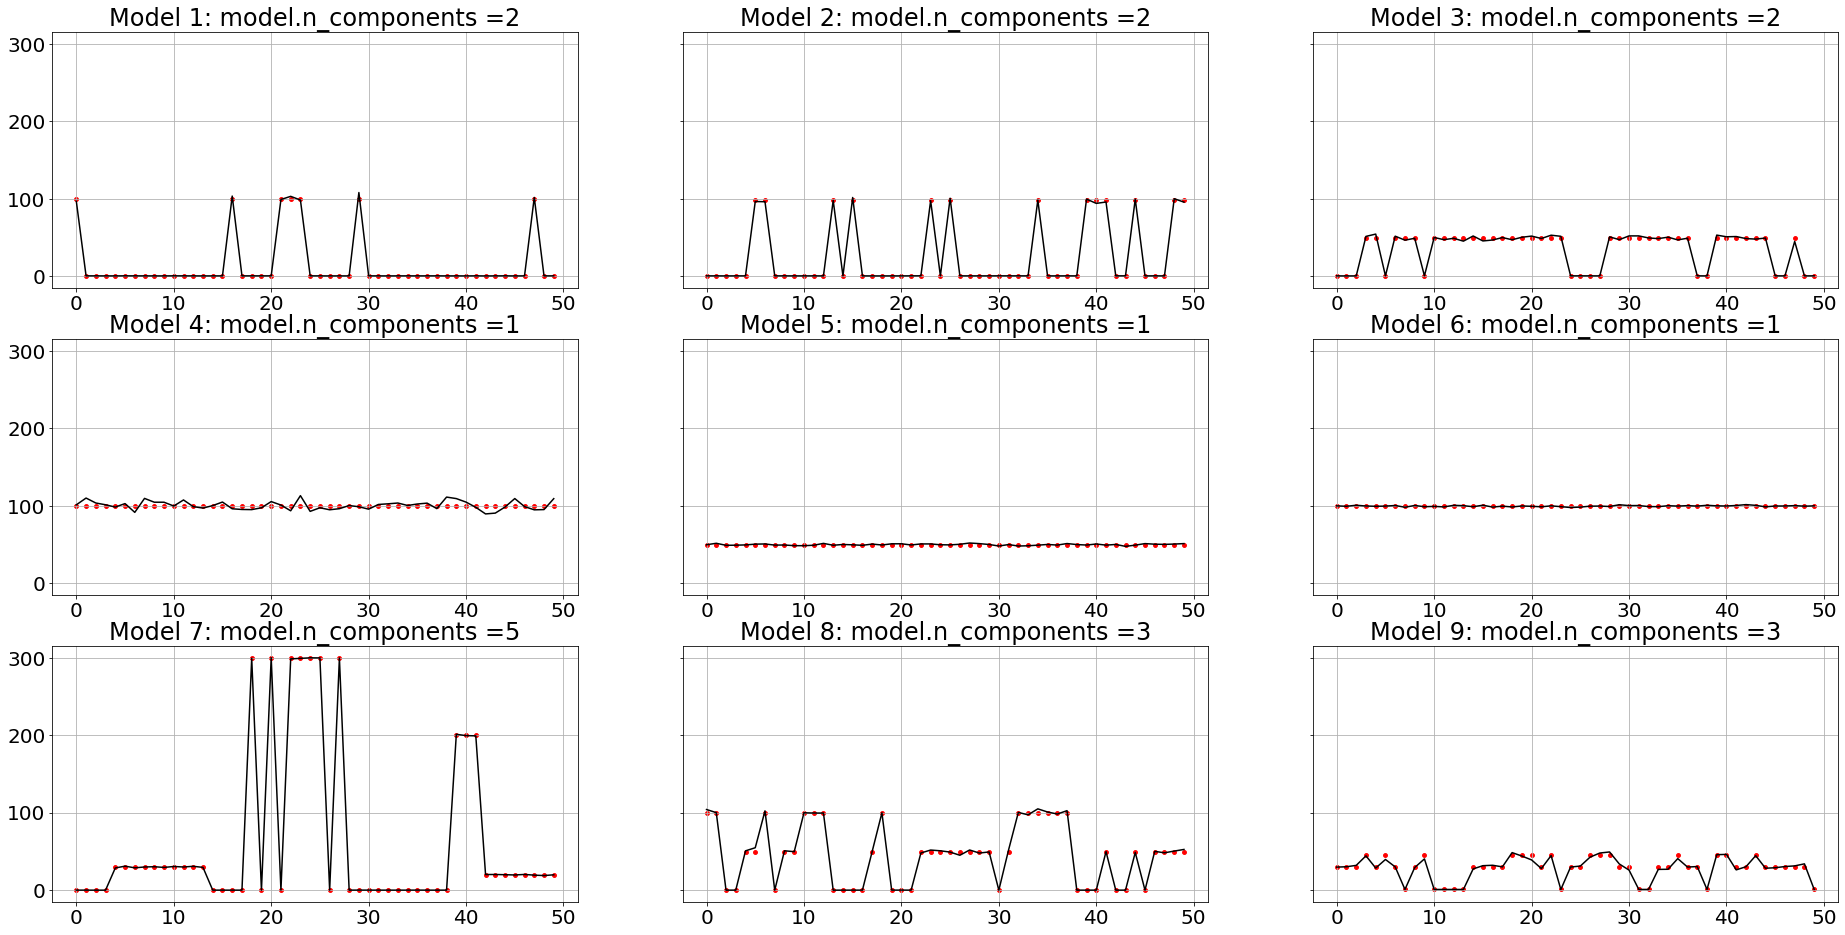

In [66]:
plt.rcParams["figure.figsize"] = (32, 16)
plt.rcParams['font.size'] = 20
fig, axes = plt.subplots(3,3, sharey = "all")
for i, ax in enumerate(axes.reshape(-1)):
    model = models_lst[i]
    try:
        X,Z = model.sample(50)
    except Exception as e:
        print(f"Error in model {i}: {e}")
        continue
        
    means = [model.means_[hidden_state] for hidden_state in Z]
    ax.plot(X, color = "black")
    ax.scatter(np.array(range(len(Z))), means, color = "red", s = 15)
    ax.set_title(f"Model {i+1}: {model.n_components =}")
    ax.grid()

NameError: name 'model_5hidden_2' is not defined